
# Classification Techniques in Python  
### Decision Tree & K-Nearest Neighbors (KNN)  
**Learning Outcome (LO10):** Apply classification techniques using Python to solve real-world problems.



## What is Classification?

Classification is a supervised machine learning task where the goal is to **predict a category or class label** based on input features.

Examples:
- Email → Spam or Not Spam  
- Student Data → At Risk or Not At Risk  
- Loan Application → Approved or Rejected  

Let’s simulate a dataset and look at how classification works.


In [1]:

from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples=10, n_features=4, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=["feature1", "feature2", "feature3", "feature4"])
df['target'] = y
df


,feature1,feature2,feature3,feature4,target
0,-0.925336,-1.140215,-0.838792,1.695858,0
1,-0.461711,-0.587231,-1.971718,2.037310,0
2,1.440444,1.777367,1.511576,-2.797760,1
3,1.547117,1.899693,0.834445,-2.399814,1
4,0.883943,1.068339,-0.970073,-0.261560,1
5,1.425444,1.727259,-1.185827,-0.712069,1
6,-0.580675,-0.720634,-0.960593,1.397206,0
7,-0.762815,-0.938205,-0.543048,1.284181,1
8,-1.597318,-1.962874,-0.992251,2.577940,0
9,-2.389360,-2.895397,1.976862,1.201904,0



## Decision Tree Classifier

A **Decision Tree** is a flowchart-like structure used to make decisions based on splitting the data by feature values.

- Easy to interpret and visualize
- Splits data based on criteria like Gini or Entropy
- Risk of overfitting

Let's train one using `DecisionTreeClassifier`.


In [2]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Predict
y_pred_tree = clf_tree.predict(X_test)

# Evaluate
accuracy_score(y_test, y_pred_tree)


1.0


## K-Nearest Neighbors (KNN)

**KNN** is an instance-based classifier that looks at the "K" closest training points to classify a new sample.

- Simple and effective
- Sensitive to feature scaling
- Slower on large datasets

Let's build one using `KNeighborsClassifier`.


In [3]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train KNN
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_knn, y_train_knn)

# Predict
y_pred_knn = clf_knn.predict(X_test_knn)

# Evaluate
accuracy_score(y_test_knn, y_pred_knn)


1.0


## Model Evaluation Metrics

To assess model performance, we use metrics like:

- **Accuracy** – How often is the prediction correct?
- **Confusion Matrix** – Breaks down TP, TN, FP, FN
- **Precision, Recall, F1-score** – Especially useful for imbalanced data

Let’s show a confusion matrix for both models.


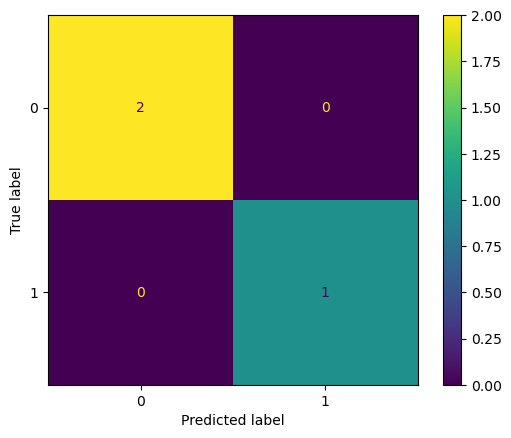

In [4]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot()


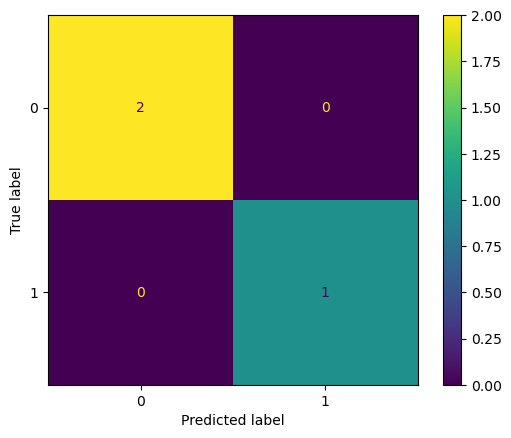

In [5]:

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()



## ✅ Summary

- Classification predicts categories or labels
- Decision Tree is interpretable and visual
- KNN is simple but requires scaling
- Use `accuracy`, `confusion_matrix`, and `f1-score` to evaluate models
- Practice with your own dataset in the mini-project
